In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [33]:
ecg = pd.read_csv("D:/22-1/ml/termp/ECG_FeaturesExtracted.csv")

In [34]:
ecg

,Quad_Cat,Mean,Min,Max,MeanRR,MedianRR,MinRR,MaxRR,LF,HF,VLF,Ibi,Bpm,Sdnn,Sdsd,Rmssd,Pnn50,pnn20,Pnn50pnn20
0,1,9.404760e-07,-0.741816,0.919643,1531,1562.0,14,3130,1.194750e-09,2.231830e-06,4.403520e-11,763.823158,78.559522,245.875789,469.052909,102253.7461,0.478903,0.481013,0.995614
1,0,4.330640e-07,-0.386809,0.452853,1582,1599.0,1336,1695,1.060430e-10,1.283180e-07,2.946190e-12,794.173554,75.573801,240.813984,468.780827,127309.4367,0.477178,0.477178,1.000000
2,0,9.034100e-06,-0.311829,0.398468,1637,1659.5,1421,1798,2.679310e-09,6.225430e-08,8.177790e-10,781.661290,76.868796,263.073272,492.561472,130746.3059,0.459459,0.459459,1.000000
3,3,-1.607510e-05,-0.330817,0.405026,1724,1727.0,1574,1895,1.345210e-08,1.348180e-07,4.147950e-09,720.920000,83.241534,243.280744,419.797884,163218.7363,0.424749,0.438127,0.969466
4,1,3.100000e-06,-0.303375,0.390093,1634,1654.0,1354,1837,7.953400e-10,1.135080e-07,2.688100e-10,779.417204,77.044532,266.303744,502.914461,121215.4100,0.480603,0.487069,0.986726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,5.233020e-06,-0.326834,0.226890,8871,2517.0,1641,61273,2.869180e-09,4.452460e-08,4.620720e-10,729.159744,82.312438,206.105776,313.428744,150982.0997,0.445513,0.509615,0.874214
308,0,3.885170e-05,-0.337467,0.267606,1942,2069.0,78,5059,1.020350e-07,2.892450e-07,3.324850e-08,746.706767,80.452141,217.496871,368.406657,129086.9816,0.615578,0.623116,0.987903
309,1,2.666020e-05,-0.327919,0.268247,1476,1342.5,57,3401,5.007920e-08,1.548030e-07,1.709190e-08,735.177570,81.646377,193.495058,311.419739,114921.7850,0.531616,0.562061,0.945833
310,3,1.031120e-04,-0.318627,0.254868,1758,1958.0,841,3610,3.491200e-07,1.011910e-06,1.064670e-07,730.368159,82.298379,188.080997,310.820126,100618.0409,0.580000,0.585000,0.991453


In [35]:
ecg['LFHF_Ratio'] = ecg.apply(lambda x : x['LF']/x['HF'], axis=1)

In [36]:
def getArousal(quad):
    if quad==0 or quad==3:
        arousal = 1
    else:
        arousal = 0
    return arousal

def getValence(quad):
    if quad==0 or quad==1:
        valence = 1
    else:
        valence = 0
    return valence

In [37]:
ecg['Arousal'] = ecg.apply(lambda x : getArousal(x['Quad_Cat']), axis=1)
ecg['Valence'] = ecg.apply(lambda x : getValence(x['Quad_Cat']), axis=1)

In [38]:
ecg

,Quad_Cat,Mean,Min,Max,MeanRR,MedianRR,MinRR,MaxRR,LF,HF,...,Bpm,Sdnn,Sdsd,Rmssd,Pnn50,pnn20,Pnn50pnn20,LFHF_Ratio,Arousal,Valence
0,1,9.404760e-07,-0.741816,0.919643,1531,1562.0,14,3130,1.194750e-09,2.231830e-06,...,78.559522,245.875789,469.052909,102253.7461,0.478903,0.481013,0.995614,0.000535,0,1
1,0,4.330640e-07,-0.386809,0.452853,1582,1599.0,1336,1695,1.060430e-10,1.283180e-07,...,75.573801,240.813984,468.780827,127309.4367,0.477178,0.477178,1.000000,0.000826,1,1
2,0,9.034100e-06,-0.311829,0.398468,1637,1659.5,1421,1798,2.679310e-09,6.225430e-08,...,76.868796,263.073272,492.561472,130746.3059,0.459459,0.459459,1.000000,0.043038,1,1
3,3,-1.607510e-05,-0.330817,0.405026,1724,1727.0,1574,1895,1.345210e-08,1.348180e-07,...,83.241534,243.280744,419.797884,163218.7363,0.424749,0.438127,0.969466,0.099780,1,0
4,1,3.100000e-06,-0.303375,0.390093,1634,1654.0,1354,1837,7.953400e-10,1.135080e-07,...,77.044532,266.303744,502.914461,121215.4100,0.480603,0.487069,0.986726,0.007007,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2,5.233020e-06,-0.326834,0.226890,8871,2517.0,1641,61273,2.869180e-09,4.452460e-08,...,82.312438,206.105776,313.428744,150982.0997,0.445513,0.509615,0.874214,0.064440,0,0
308,0,3.885170e-05,-0.337467,0.267606,1942,2069.0,78,5059,1.020350e-07,2.892450e-07,...,80.452141,217.496871,368.406657,129086.9816,0.615578,0.623116,0.987903,0.352763,1,1
309,1,2.666020e-05,-0.327919,0.268247,1476,1342.5,57,3401,5.007920e-08,1.548030e-07,...,81.646377,193.495058,311.419739,114921.7850,0.531616,0.562061,0.945833,0.323503,0,1
310,3,1.031120e-04,-0.318627,0.254868,1758,1958.0,841,3610,3.491200e-07,1.011910e-06,...,82.298379,188.080997,310.820126,100618.0409,0.580000,0.585000,0.991453,0.345011,1,0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ecg_all_features_without_label = ecg.iloc[:, 1:-2]

In [41]:
scaler = StandardScaler()
ecg_all_std = scaler.fit_transform(ecg_all_features_without_label)

ecg_all_std_df = pd.DataFrame(ecg_all_std, columns=['Mean', 'Min', 'Max', 'MeanRR', 'MedianRR', 'MinRR',
       'MaxRR', 'LF', 'HF', 'VLF', 'Ibi', 'Bpm', 'Sdnn', 'Sdsd', 'Rmssd','Pnn50', 'pnn20', 'Pnn50pnn20', 'LFHF_Ratio'])
ecg_all_std_df['Quad_Cat'] = ecg.loc[:, ['Quad_Cat']]
ecg_all_std_df['Arousal'] = ecg.loc[:, ['Arousal']]
ecg_all_std_df['Valence'] = ecg.loc[:, ['Valence']]

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
X = ecg_all_std_df.loc[:, ['Mean', 'Min', 'Max', 'MeanRR', 'MedianRR', 'MinRR',
       'MaxRR', 'LF', 'HF', 'VLF', 'Ibi', 'Bpm', 'Sdnn', 'Sdsd', 'Rmssd','Pnn50', 'pnn20', 'Pnn50pnn20', 'LFHF_Ratio']]
y = ecg_all_std_df.loc[:, ['Valence']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 11)

In [44]:
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=4, metric = "manhattan")
knn_clf.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [45]:
y_knn_pred = knn_clf.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.4444444444444444

In [52]:
from sklearn.model_selection import cross_val_score

knn_cv = cross_val_score(knn_clf, X, y, cv=5)
knn_cv.mean()

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.4841269841269841

In [50]:
acc = []
for k in range(1, 30):
  knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors= k)
  score = cross_val_score(knn_clf, X_train, y_train, cv=5)
  acc.append(score.mean())

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Text(0, 0.5, 'acc')

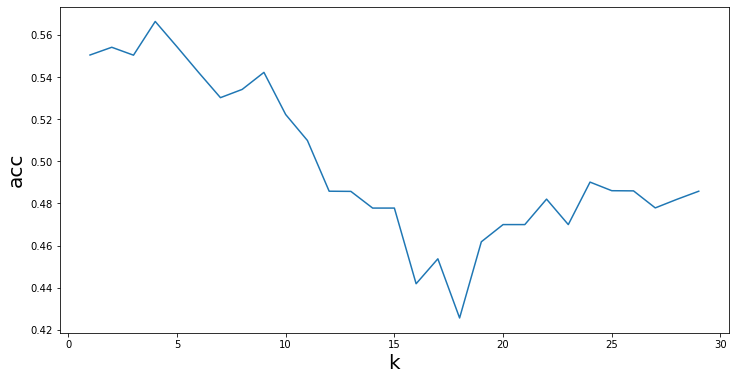

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,30), y = acc)
plt.xlabel("k",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [55]:
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors= 4)
score = cross_val_score(knn_clf, X_train, y_train, cv=5)
score.mean()

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

0.5663673469387756